#### Задание 

- По образу практики, создать искусственный датасет с лишними столбцами. 
- Целевую метку, при правильной обработке данных, формируйте таким образом, чтобы без затруднений её смогла описать линейная модель. 
- Цель - достичь базового понимания проблемы.

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

In [3]:
# Создаём сэмпл с целевым параметром уровня дохода (income)

height_men  = stats.norm.rvs(loc=175, scale=6, size=19000)  # Выборка мужчин со средним ростом 175
height_women = stats.norm.rvs(loc=165, scale=3.5, size=21000)  # Выборка женщин со средним ростом 165

top_men = stats.norm.rvs(loc=85, scale=5, size=800) #рук 85/60 тыс 80%/20%
top_women = stats.norm.rvs(loc=60, scale=3, size=200)

middle_men = stats.norm.rvs(loc=55, scale=4, size=2600) #ст спец и рук ср звена 55/40 65%/35%
middle_women = stats.norm.rvs(loc=40, scale=3, size=1400)

empl_men = stats.norm.rvs(loc=35, scale=3, size=10000) #служ 35/20 40%/60%
empl_women = stats.norm.rvs(loc=20, scale=2, size=15000)

work_men = stats.norm.rvs(loc=35, scale=4, size=6500) #раб 35/20 65%/35%
work_women = stats.norm.rvs(loc=20, scale=1.5, size=3500)

brain_size_men = stats.norm.rvs(loc=1650, scale=14, size=19000)
brain_size_woman = stats.norm.rvs(loc=1400, scale=15, size=21000)

iq_men = stats.norm.rvs(loc=100, scale=10, size=19000)
iq_women = stats.norm.rvs(loc=100, scale=4, size=21000)

In [4]:
sp = pd.DataFrame()
name = ['top', 'top', 'middle', 'middle', 'empl', 'empl', 'work', 'work']
gender = [1, 0, 1, 0, 1, 0, 1, 0]
n = 0

for i in [top_men, top_women, middle_men, middle_women, empl_men, empl_women, work_men, work_women]:
    
    sp_x = pd.DataFrame(i)
    sp_x['work'] = name[n]
    sp_x['gender'] = gender[n]
    n = n + 1
    
    sp = pd.concat([sp, sp_x])

sp.rename(columns = {0: 'income'}, inplace=True)

In [5]:
brain_size_m = pd.DataFrame(brain_size_men)
brain_size_w = pd.DataFrame(brain_size_woman)
brain_size_m['gender'] = 1
brain_size_w['gender'] = 0
brain = pd.concat([brain_size_m, brain_size_w]).sort_values(by=['gender', 0]).reset_index()
#br_size_s = brain_size_m.sort_values(by=['gender', 0]).reset_index()

iq_m = pd.DataFrame(iq_men)
iq_w = pd.DataFrame(iq_women)
iq_m['gender'] = 1
iq_w['gender'] = 0
iq = pd.concat([iq_m, iq_w]).sort_values(by=['gender', 0]).reset_index()
#iq_m_s = iq_m.sort_values(by=['gender', 0]).reset_index()

brain_iq = brain.join(iq, lsuffix='_br', rsuffix='_iq')

In [6]:
height_m = pd.DataFrame(height_men)
height_w = pd.DataFrame(height_women)
height_m['gender'] = 1
height_w['gender'] = 0

height = pd.concat([height_m, height_w]).sort_values(by=['gender']).reset_index()
height

,index,0,gender
0,999,160.032749,0
1,7663,168.051835,0
2,7664,164.310707,0
3,7665,161.372916,0
4,7666,166.586330,0
...,...,...,...
39995,12669,174.795184,1
39996,12670,179.008946,1
39997,12671,169.394756,1
39998,12673,181.427141,1


In [8]:
sp_s = sp.sort_values(by=['gender', 'income']).reset_index()
brain_sp = brain_iq.join(sp_s, lsuffix='_br', rsuffix='_sp')

del brain_sp['index_br']
del brain_sp['index_iq']
del brain_sp['index']
del brain_sp['gender_br']
del brain_sp['gender_iq']

brain_sp.rename(columns = {'0_br': 'brain_size', '0_iq': 'IQ'}, inplace=True)
br_sp_h = brain_sp.join(height, lsuffix='_sp', rsuffix='_h')
del br_sp_h['gender_h']
br_sp_h.rename(columns = {0: 'height', 'gender_sp': 'gender'}, inplace=True)

del br_sp_h['index']

br_sp_h

,brain_size,IQ,income,work,gender,height
0,1345.945111,84.769122,12.060232,empl,0,160.032749
1,1346.094137,84.821823,12.088646,empl,0,168.051835
2,1346.970711,84.838842,12.204607,empl,0,164.310707
3,1348.589740,84.948257,12.569703,empl,0,161.372916
4,1348.695482,85.050986,12.899591,empl,0,166.586330
...,...,...,...,...,...,...
39995,1698.741165,134.470681,96.666249,top,1,174.795184
39996,1703.121999,134.514376,97.486667,top,1,179.008946
39997,1703.144157,135.834201,97.761530,top,1,169.394756
39998,1703.316033,135.890500,97.936370,top,1,181.427141


In [9]:
# изучим данные на предмет пропусков и типов данных
br_sp_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   brain_size  40000 non-null  float64
 1   IQ          40000 non-null  float64
 2   income      40000 non-null  float64
 3   work        40000 non-null  object 
 4   gender      40000 non-null  int64  
 5   height      40000 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 1.8+ MB


In [10]:
# переведем значения work в отдельные столбцы
data = pd.get_dummies(br_sp_h.loc[:, ['brain_size', 'IQ', 'income', 'gender', 'height', 'work']])
data

,brain_size,IQ,income,gender,height,work_empl,work_middle,work_top,work_work
0,1345.945111,84.769122,12.060232,0,160.032749,1,0,0,0
1,1346.094137,84.821823,12.088646,0,168.051835,1,0,0,0
2,1346.970711,84.838842,12.204607,0,164.310707,1,0,0,0
3,1348.589740,84.948257,12.569703,0,161.372916,1,0,0,0
4,1348.695482,85.050986,12.899591,0,166.586330,1,0,0,0
...,...,...,...,...,...,...,...,...,...
39995,1698.741165,134.470681,96.666249,1,174.795184,0,0,1,0
39996,1703.121999,134.514376,97.486667,1,179.008946,0,0,1,0
39997,1703.144157,135.834201,97.761530,1,169.394756,0,0,1,0
39998,1703.316033,135.890500,97.936370,1,181.427141,0,0,1,0


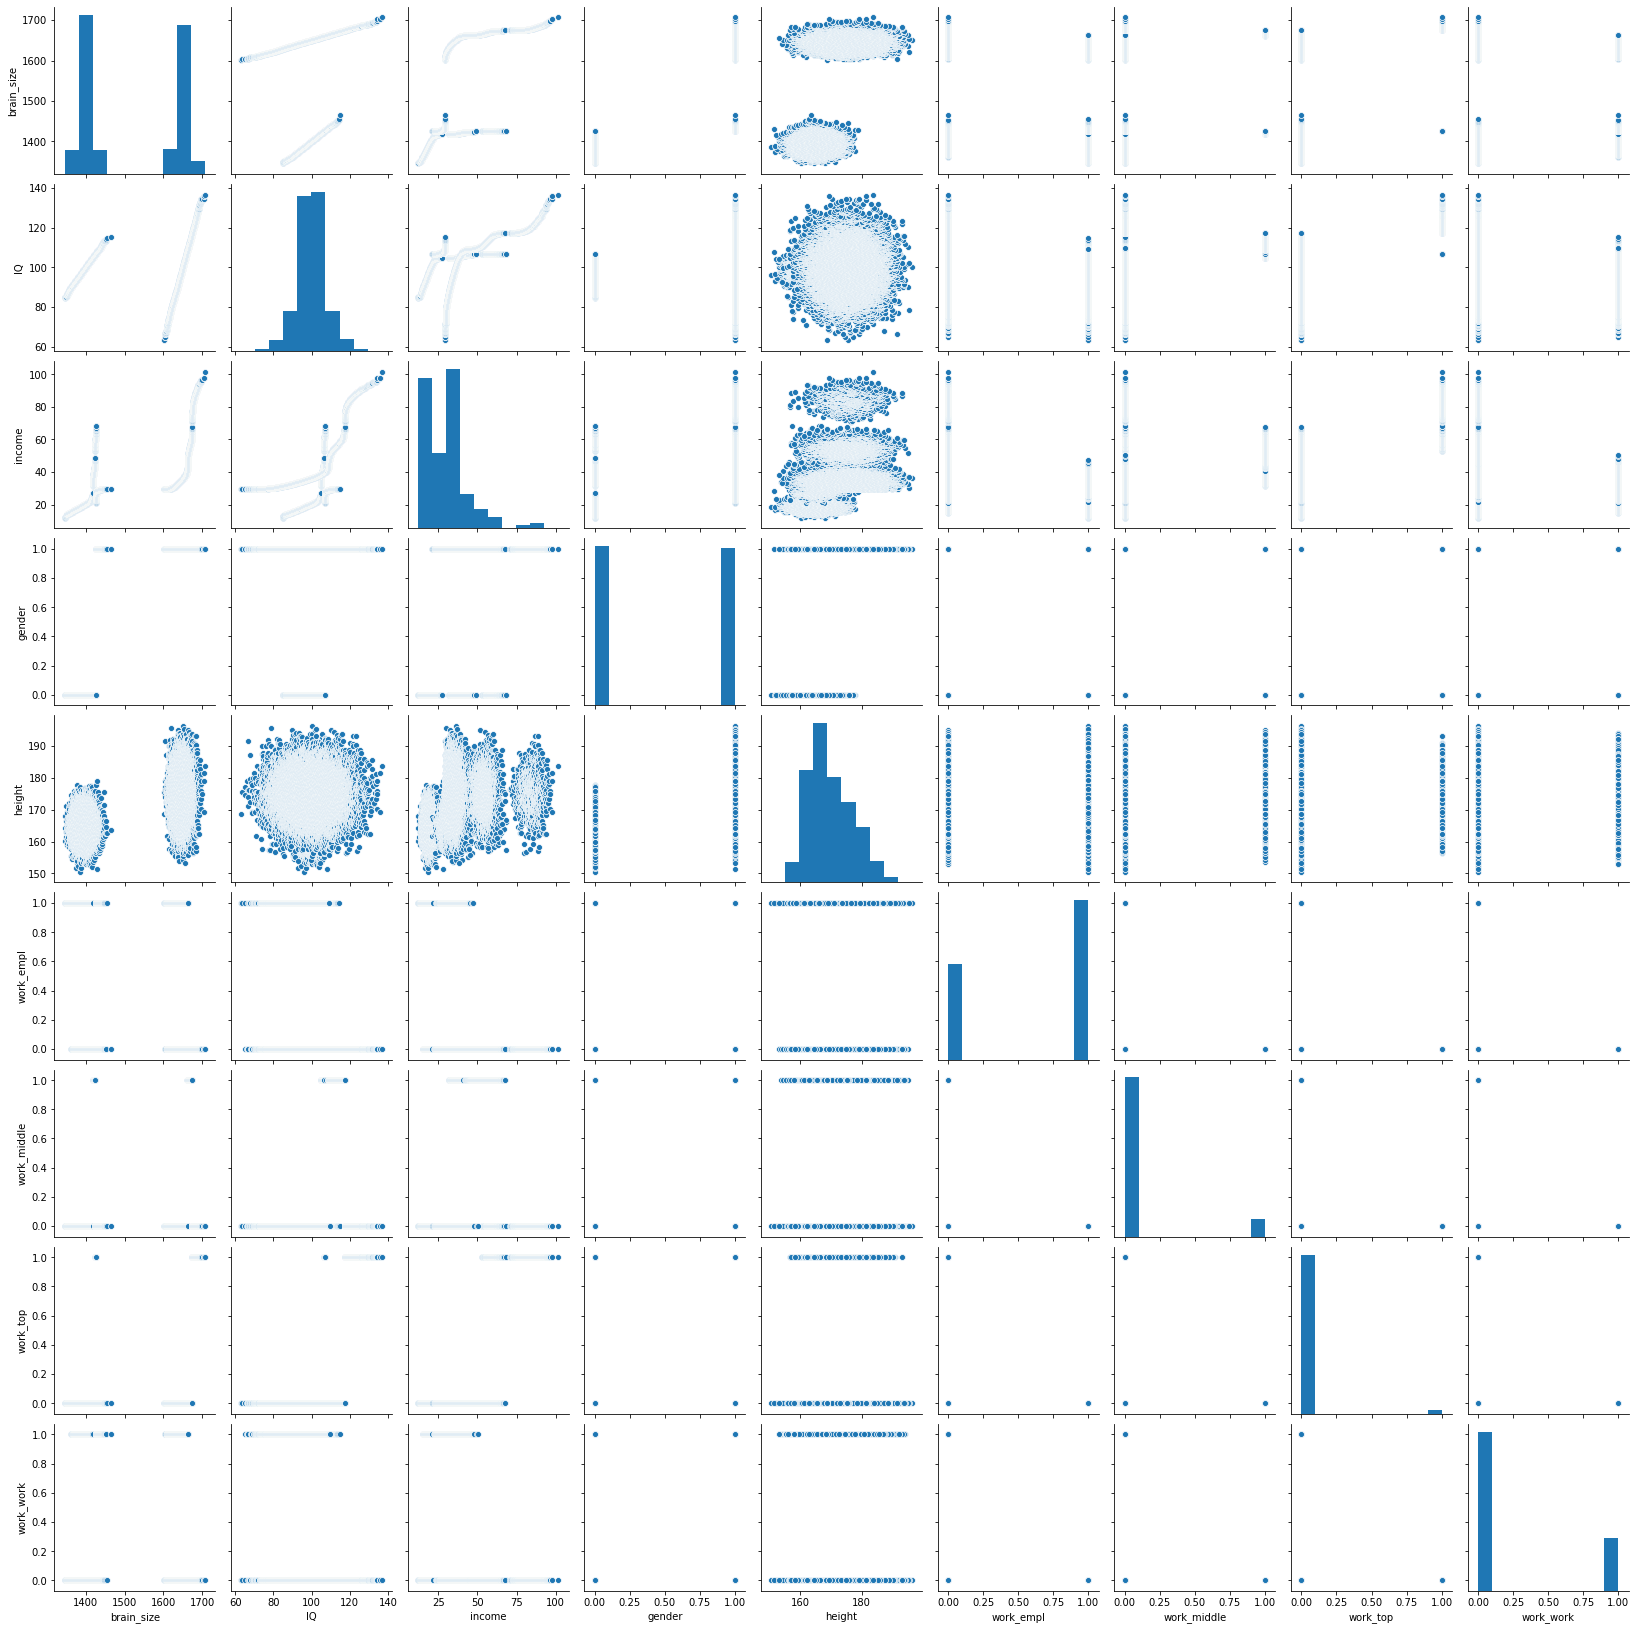

In [11]:
# оценим данные на предмет связей
sns.pairplot(data)

In [ ]:
# целевой параметр (income) имеет линейную зависимость с brain_size и IQ. При этом, эти два параметра еще более взаимозависимы. 
# также с целевым параметром связан уровень трудовой занятости. При этом, уровнь занятости связан и с IQ.
# интересную зависимость имеют IQ и height (скорей всего случайно)

In [12]:
# Рассчитаем коэффициенты корреляции Пирсона
data.corr()

,brain_size,IQ,income,gender,height,work_empl,work_middle,work_top,work_work
brain_size,1.000000,0.108384,0.744498,0.961015,0.715449,-0.264491,0.165365,0.140329,0.130545
IQ,0.108384,1.000000,0.577944,0.055153,0.001334,-0.294393,0.448871,0.396247,-0.124714
income,0.744498,0.577944,1.000000,0.677629,0.496188,-0.456231,0.484238,0.597473,-0.040830
gender,0.961015,0.055153,0.677629,1.000000,0.688623,-0.251747,0.101668,0.096879,0.176094
height,0.715449,0.001334,0.496188,0.688623,1.000000,-0.163900,0.085958,0.075294,0.096545
work_empl,-0.264491,-0.294393,-0.456231,-0.251747,-0.163900,1.000000,-0.430331,-0.206725,-0.745356
work_middle,0.165365,0.448871,0.484238,0.101668,0.085958,-0.430331,1.000000,-0.053376,-0.192450
work_top,0.140329,0.396247,0.597473,0.096879,0.075294,-0.206725,-0.053376,1.000000,-0.092450
work_work,0.130545,-0.124714,-0.040830,0.176094,0.096545,-0.745356,-0.192450,-0.092450,1.000000


In [ ]:
# income более коррелирует с brain_size и gender
# height имеет высокую корреляцию с brain_size
# из уровней занятости имеет смысл использовать work_middle, work_top - они имеют значимую корреляцию

#Лучше всего для построения модели использовать brain_size и gender, work_middle, work_top

In [21]:
from sklearn.metrics import mean_absolute_error

X = data[['brain_size', 'gender', 'work_middle', 'work_top']]
y = data['income']

reg = LinearRegression().fit(X, y)

print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['brain_size', 'gender', 'work_middle', 'work_top']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))
print(reg.score(X, y))

Weights: [ 0.05416283  2.27534907 18.39482315 45.48856805]
Bias: -55.69613544599573
Error: 1.7154646834824319
0.9679544897984756


In [22]:
# Получился хороший результат. Попробуем добавить данные по IQ и height
X1 = data[['brain_size', 'gender', 'work_middle', 'work_top', 'IQ', 'height']]
y = data['income']

reg = LinearRegression().fit(X1, y)

print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['brain_size', 'gender', 'work_middle', 'work_top', 'IQ', 'height']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))
print('Score:', reg.score(X1, y))

Weights: [ 5.32829746e-02  2.65766445e+00  1.45309431e+01  3.88387073e+01
  3.27953751e-01 -4.07297322e-04]
Bias: -86.73345436838366
Error: 0.6731647340442262
Score: 0.9895183105604564


In [23]:
# Получился хороший результат. Попробуем убрать height
X2 = data[['brain_size', 'gender', 'work_middle', 'work_top', 'IQ']]
y = data['income']

reg = LinearRegression().fit(X2, y)

print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['brain_size', 'gender', 'work_middle', 'work_top', 'IQ']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))
print('Score:', reg.score(X2, y))

Weights: [ 0.05326587  2.65786325 14.53093417 38.8386234   0.32798447]
Bias: -86.77978574887308
Error: 0.6731823307046013
Score: 0.9895182881707474
